In [1]:
#importing required libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

import warnings
warnings.filterwarnings('ignore')


C:\Users\HP\AppData\Local\Temp\ipykernel_4716\3469722629.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
data = pd.read_csv('train.csv')
unseen = pd.read_csv('test.csv')
unseen1 = pd.read_csv('test.csv')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# 

### Understanding the Data

In [3]:
data.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [4]:
data.shape

(29733, 61)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

 By the looks of the data, though columns like  'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', looks numerial, but they are categorical variables. 

Also we can drop remove column date as we have seperate columns for year,month

In [6]:
cat = [ 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']


for i in cat:
    data[cat]= data[cat].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             29733 non-null  int64   
 1   url                            29733 non-null  object  
 2   n_tokens_title                 29733 non-null  float64 
 3   n_tokens_content               29733 non-null  float64 
 4   n_unique_tokens                29733 non-null  float64 
 5   n_non_stop_words               29733 non-null  float64 
 6   n_non_stop_unique_tokens       29733 non-null  float64 
 7   num_hrefs                      28921 non-null  float64 
 8   num_self_hrefs                 25200 non-null  float64 
 9   num_imgs                       24326 non-null  float64 
 10  num_videos                     29146 non-null  float64 
 11  average_token_length           29733 non-null  float64 
 12  num_keywords                   2

In [8]:
data.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28921.000000,25200.000000,24326.000000,29146.000000,29733.000000,29269.000000,28649.000000,29277.000000,29649.000000,29596.000000,28218.000000,29616.000000,29428.000000,29052.000000,28760.000000,29449.000000,27971.000000,29409.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,27487.000000,29382.000000,28898.000000,28845.000000,29146.000000,29140.000000,28495.000000,29288.000000,29584.000000,29546.000000,28951.000000,29021.000000,29605.000000,29466.000000,28934.000000,28276.000000,29733.000000
mean,14866.000000,10.403861,545.376652,0.554071,1.004238,0.694586,10.866706,3.285397,4.512785,1.263364,4.542961,7.217978,25.835945,1154.769238,311.128475,13653.678571,753460.486214,259904.903376,1121.525349,5658.801071,3141.089645,3949.202204,10461.340237,6426.079278,0.185391,0.140411,0.217210,0.223688,0.233266,0.443130,0.118950,0.039554,0.016590,0.681376,0.287926,0.353170,0.095636,0.755106,-0.259057,-0.521207,-0.106996,0.282072,0.071137,0.342417,0.155628,3439.840581
std,8583.322113,2.122101,471.476136,4.064623,6.039790,3.768884,11.384882,3.851624,8.335517,4.158469,0.855936,1.912259,69.316700,4008.595967,623.943555,57864.532067,213165.450292,135215.399335,1136.661797,6094.277266,1323.734009,18771.379524,41548.116050,23705.054711,0.264106,0.218503,0.283237,0.295239,0.288963,0.117417,0.096957,0.017454,0.010783,0.191247,0.156156,0.105223,0.071699,0.248494,0.128085,0.291191,0.095238,0.324263,0.265052,0.188547,0.226089,12212.123341
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,7433.000000,9.000000,245.000000,0.471376,1.000000,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,-1.000000,444.000000,141.000000,0.000000,843300.000000,173296.428572,0.000000,3562.101631,2386.456742,636.000000,1100.000000,980.000000,0.025060,0.025013,0.028571,0.028571,0.028574,0.396066,0.057553,0.028270,0.009597,0.600000,0.185714,0.305029,0.050000,0.600000,-0.327972,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,947.000000
50%,14866.000000,10.000000,407.000000,0.540000,1.000000,0.691275,7.000000,3.000000,1.000000,0.000000,4.663717,7.000000,-1.000000,659.000000,234.000000,1400.000000,843300.000000,245175.000000,1034.572222,4356.132779,2873.400669,1200.000000,2900.000000,2200.000000,0.033389,0.033346,0.040005,0.040001,0.040771,0.453485,0.118794,0.038961,0.015358,0.709677,0.280000,0.358636,0.100000,0.800000,-0.253332,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,22299.000000,12.000000,714.000000,0.609053,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,4.854545,9.000000,4.000000,1000.000000,355.125000,7900.000000,843300.000000,332238.125000,2060.518549,6024.067582,3605.463865,2600.000000,8000.000000,5200.000000,0.242018,0.150309,0.334032,0.376661,0.397958,0.508134,0.177326,0.050209,0.021739,

In [9]:
#let us drop id and url columns as they seem useless for building a model

data.drop(['id','url'], axis = 1, inplace = True)

In [10]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


### Data Handling and Cleaning

In [11]:
#Checking for Missing Values

missing_vals= round(100*data.isnull().sum()/len(data),2)
missing_vals

n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg                        1.03
kw_max_avg                        2.29
kw_avg_avg               

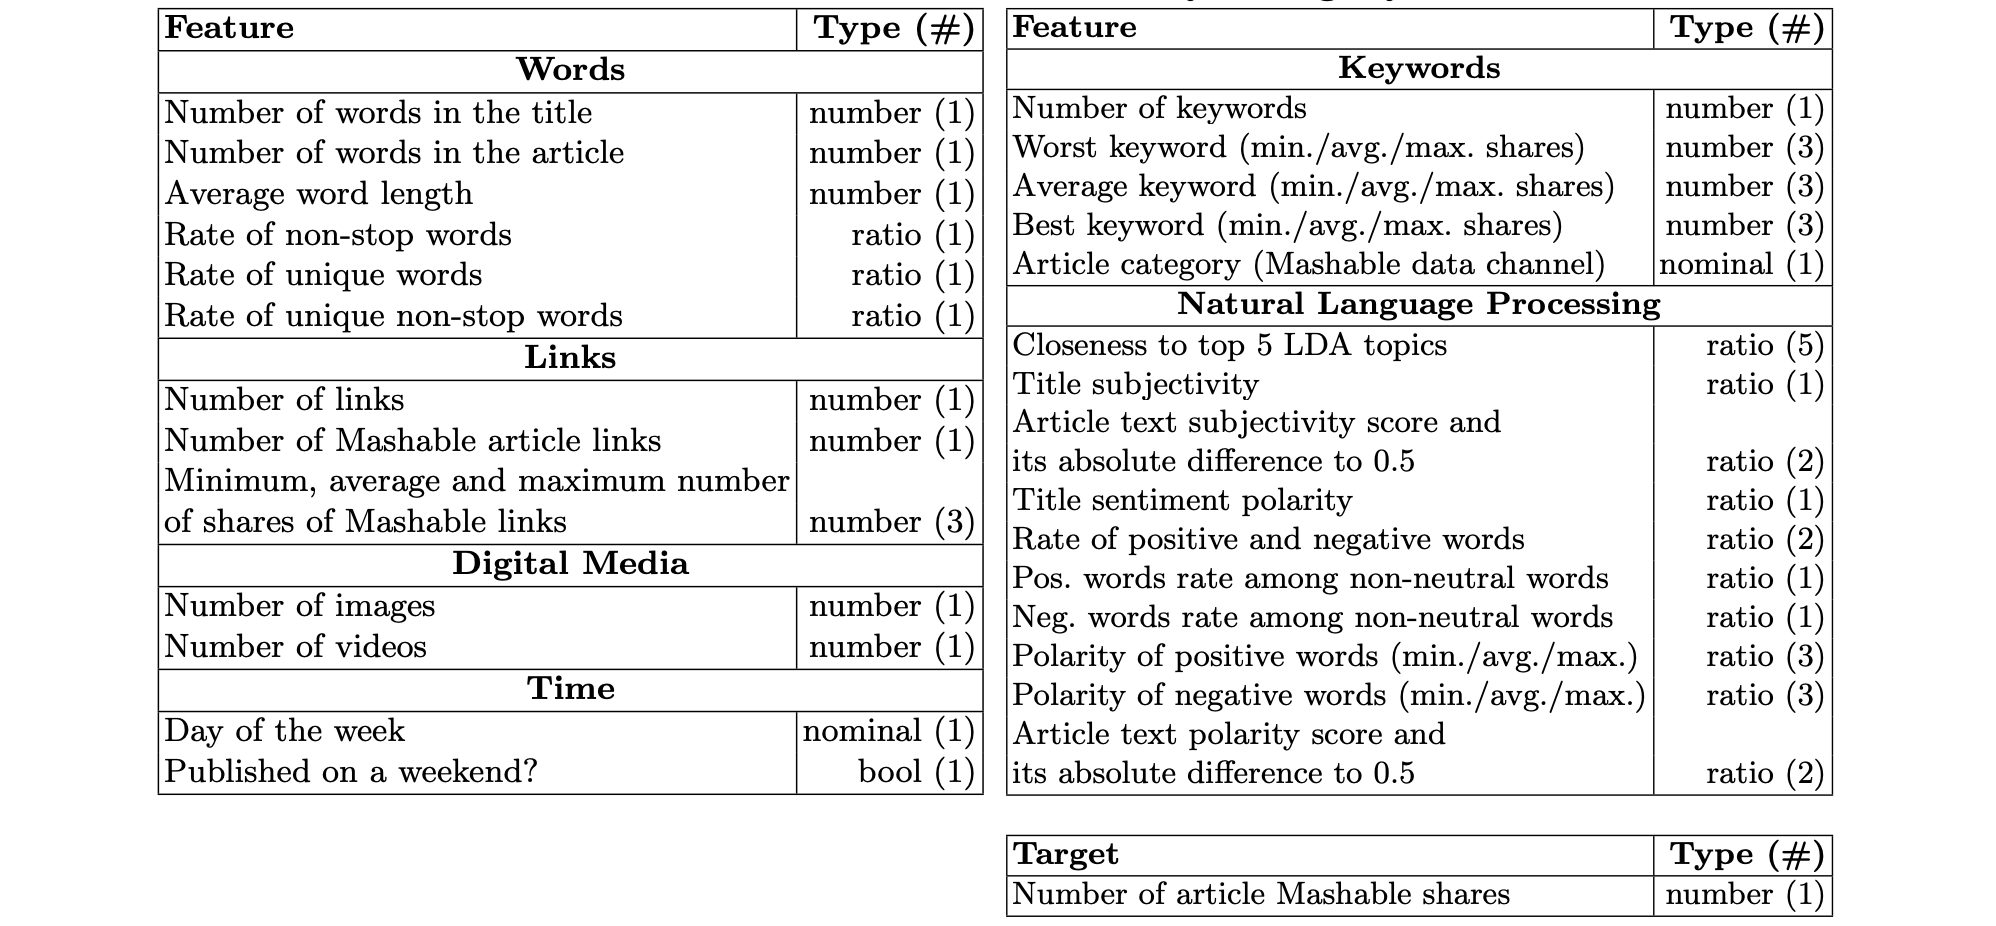

In [12]:
#printing feature image for category reference
from IPython.display import Image
Image(filename="features.png")

In [13]:
#Missing values greater than 5% in data set
missing_vals[missing_vals.gt(0)].index

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [14]:
data['weekday_is_wednesday'].value_counts()

0.0    22895
1.0     5284
Name: weekday_is_wednesday, dtype: int64

In [15]:
data[cat] = data[cat].apply(lambda x: x.fillna(x.mode()[0]))    #Imputing categoring vals with mode

In [16]:
missing_vals= round(100*data.isnull().sum()/len(data),2)
missing_vals[missing_vals.gt(0)].index

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [17]:
# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer
MICE = IterativeImputer()
data[missing_vals[missing_vals.gt(0)].index]= MICE.fit_transform(data[missing_vals[missing_vals.gt(0)].index])


In [18]:
round(100*data.isnull().sum()/len(data),2)

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0.0
self_reference_min_shares        0.0
s

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   n_tokens_title                 29733 non-null  float64 
 1   n_tokens_content               29733 non-null  float64 
 2   n_unique_tokens                29733 non-null  float64 
 3   n_non_stop_words               29733 non-null  float64 
 4   n_non_stop_unique_tokens       29733 non-null  float64 
 5   num_hrefs                      29733 non-null  float64 
 6   num_self_hrefs                 29733 non-null  float64 
 7   num_imgs                       29733 non-null  float64 
 8   num_videos                     29733 non-null  float64 
 9   average_token_length           29733 non-null  float64 
 10  num_keywords                   29733 non-null  float64 
 11  data_channel_is_lifestyle      29733 non-null  category
 12  data_channel_is_entertainment  2

## Exploratory Data Analysis

In [20]:
num_cols=[*data._get_numeric_data().columns]     # Selecting all Numerical variables
cat_cols=[*set(data.columns)-set(num_cols)]   # Selecting all Categories variables

In [21]:
cat_cols

['data_channel_is_entertainment',
 'data_channel_is_socmed',
 'weekday_is_sunday',
 'is_weekend',
 'data_channel_is_world',
 'weekday_is_monday',
 'weekday_is_friday',
 'weekday_is_wednesday',
 'data_channel_is_lifestyle',
 'weekday_is_tuesday',
 'weekday_is_thursday',
 'data_channel_is_tech',
 'data_channel_is_bus',
 'weekday_is_saturday']

In [22]:
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('....................................')

0.0    0.824673
1.0    0.175327
Name: data_channel_is_entertainment, dtype: float64
....................................
0.0    0.941614
1.0    0.058386
Name: data_channel_is_socmed, dtype: float64
....................................
0.0    0.935324
1.0    0.064676
Name: weekday_is_sunday, dtype: float64
....................................
0.0    0.879696
1.0    0.120304
Name: is_weekend, dtype: float64
....................................
0.0    0.78613
1.0    0.21387
Name: data_channel_is_world, dtype: float64
....................................
0.0    0.837655
1.0    0.162345
Name: weekday_is_monday, dtype: float64
....................................
0.0    0.861198
1.0    0.138802
Name: weekday_is_friday, dtype: float64
....................................
0.0    0.822285
1.0    0.177715
Name: weekday_is_wednesday, dtype: float64
....................................
0.0    0.947331
1.0    0.052669
Name: data_channel_is_lifestyle, dtype: float64
.................................

In [23]:
#Creating functions for plots
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
def univariate(variable, stats=True):
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(var1, var2)

##### Univariate Analysis

count    29733.000000
mean        10.403861
std          2.122101
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64


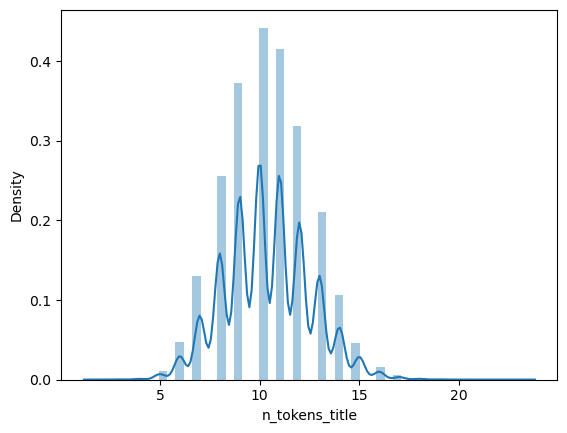

In [24]:
univariate(data.n_tokens_title)

count    29733.000000
mean         1.264279
std          4.122990
min         -9.653972
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64


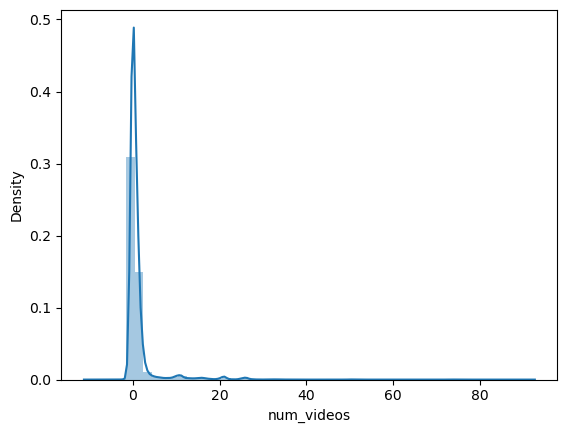

In [25]:
univariate(data.num_videos)

0.0    24906
1.0     4827
Name: weekday_is_monday, dtype: int64


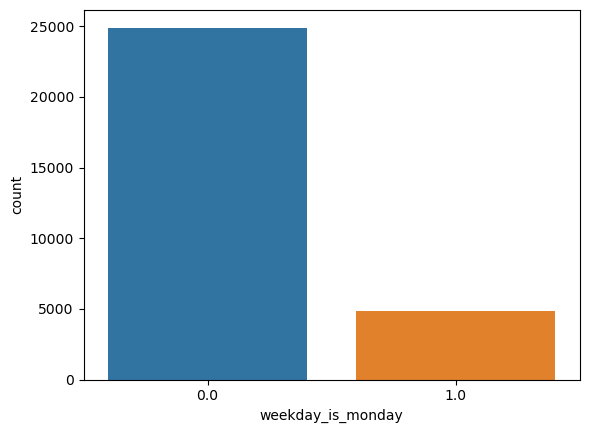

In [26]:
univariate(data.weekday_is_monday)

- No of words in a title ranges between 5 and 15
-

In [27]:
data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

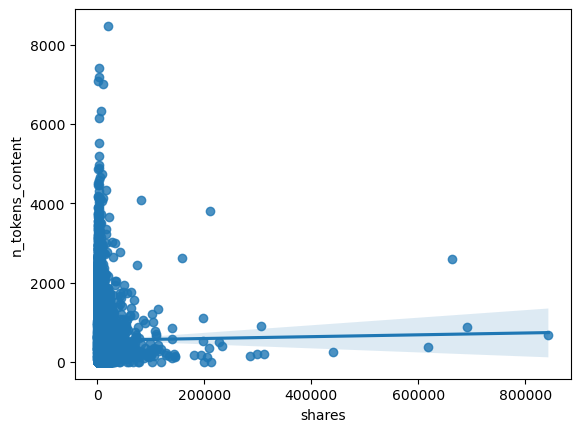

In [28]:
bivariate(data.shares, data.n_tokens_content)

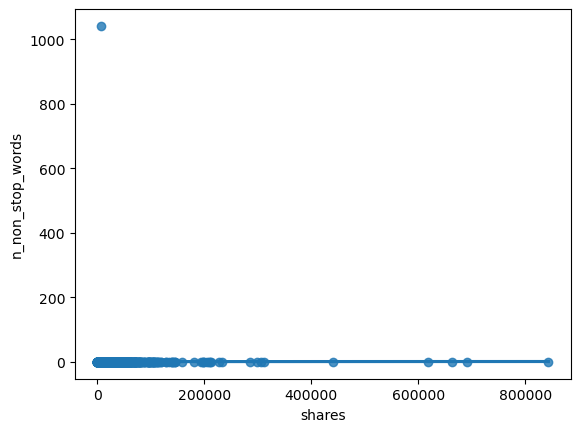

In [29]:
bivariate(data.shares, data.n_non_stop_words)

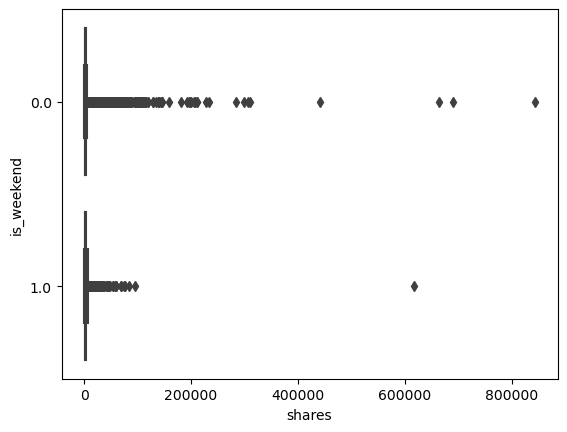

In [30]:
bivariate(data.shares, data.is_weekend)

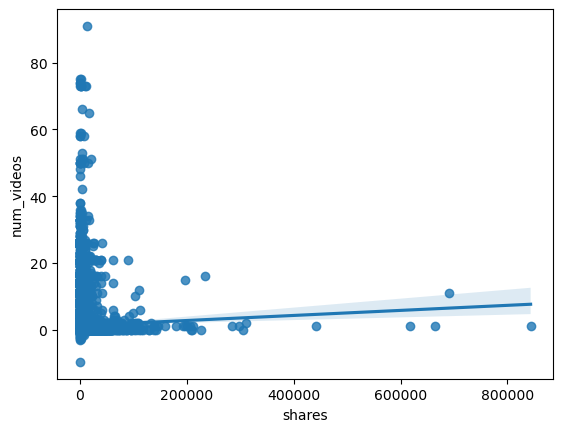

In [31]:
bivariate(data.shares, data.num_videos)

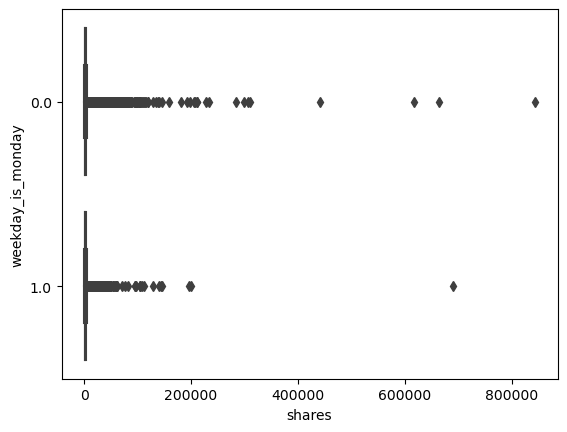

In [32]:
bivariate(data.shares, data.weekday_is_monday)

### Handling Outliers

<AxesSubplot:>

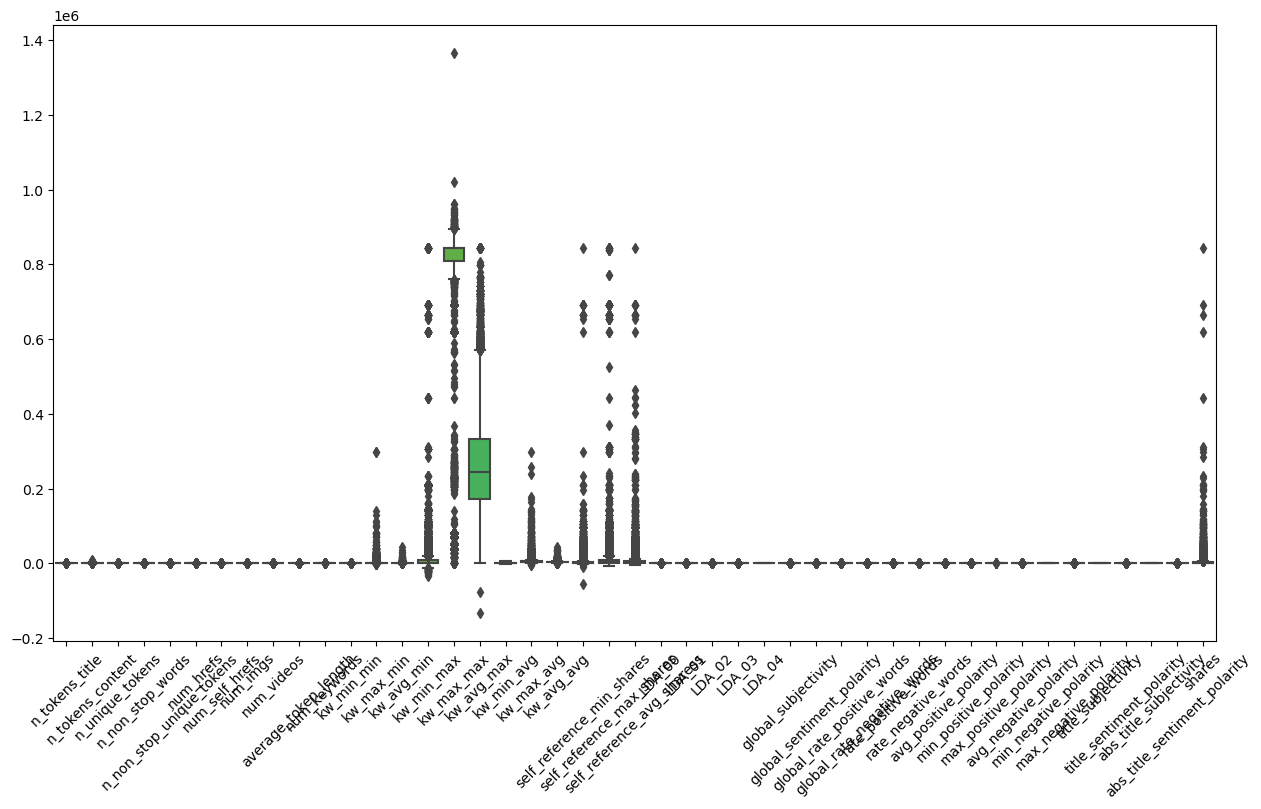

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data)

In [34]:
def cap_outliers(array):
    Q1= array.quantile(0.25)
    Q3= array.quantile(0.75)
    IQR = Q3- Q1
    upper_limit = Q3+ 1.5* IQR
    lower_limit = Q1- 1.5* IQR
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [35]:
Q1= data['num_self_hrefs'].quantile(0.25)
Q3= data['num_self_hrefs'].quantile(0.75)
IQR = Q3- Q1

Q1,Q3,IQR


(1.0, 4.0, 3.0)

In [36]:
# cap outliers in the numeric columns
data[num_cols] = data[num_cols].apply(cap_outliers, axis=0)

<AxesSubplot:>

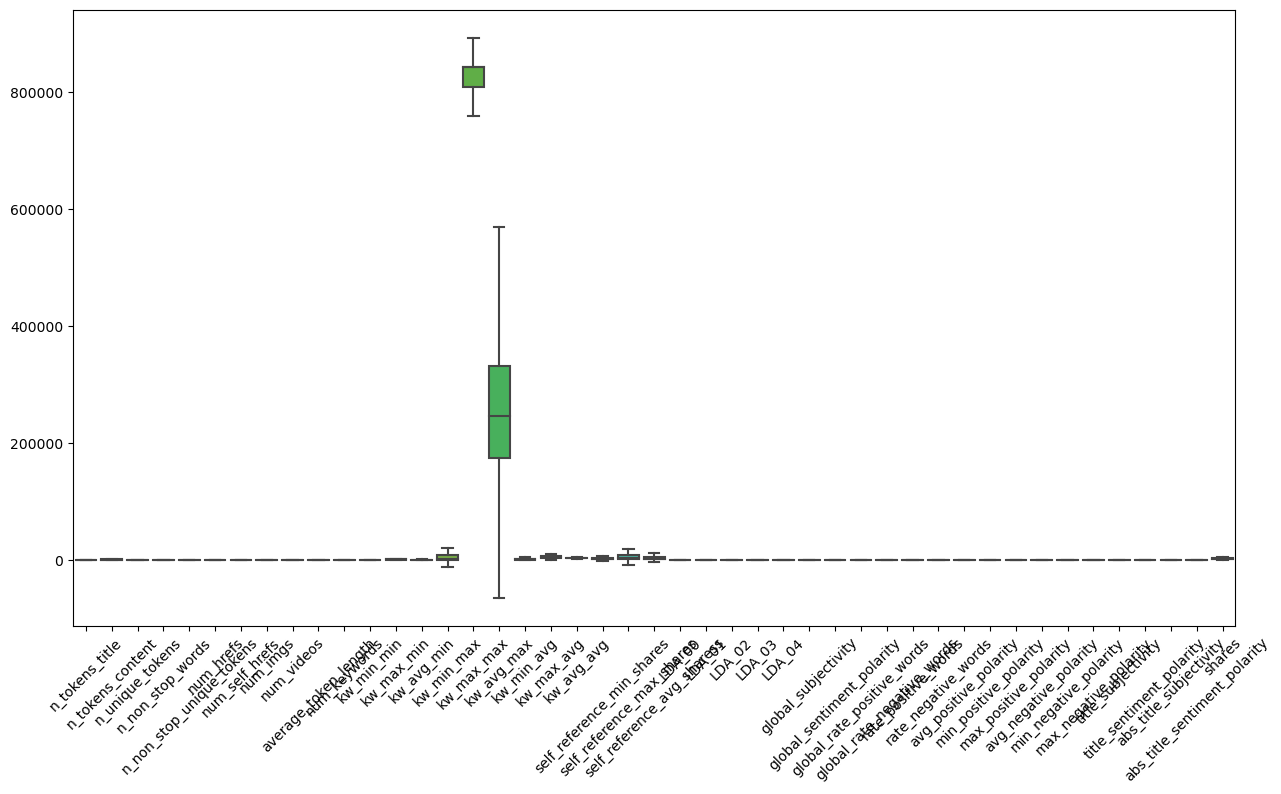

In [37]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data[num_cols])

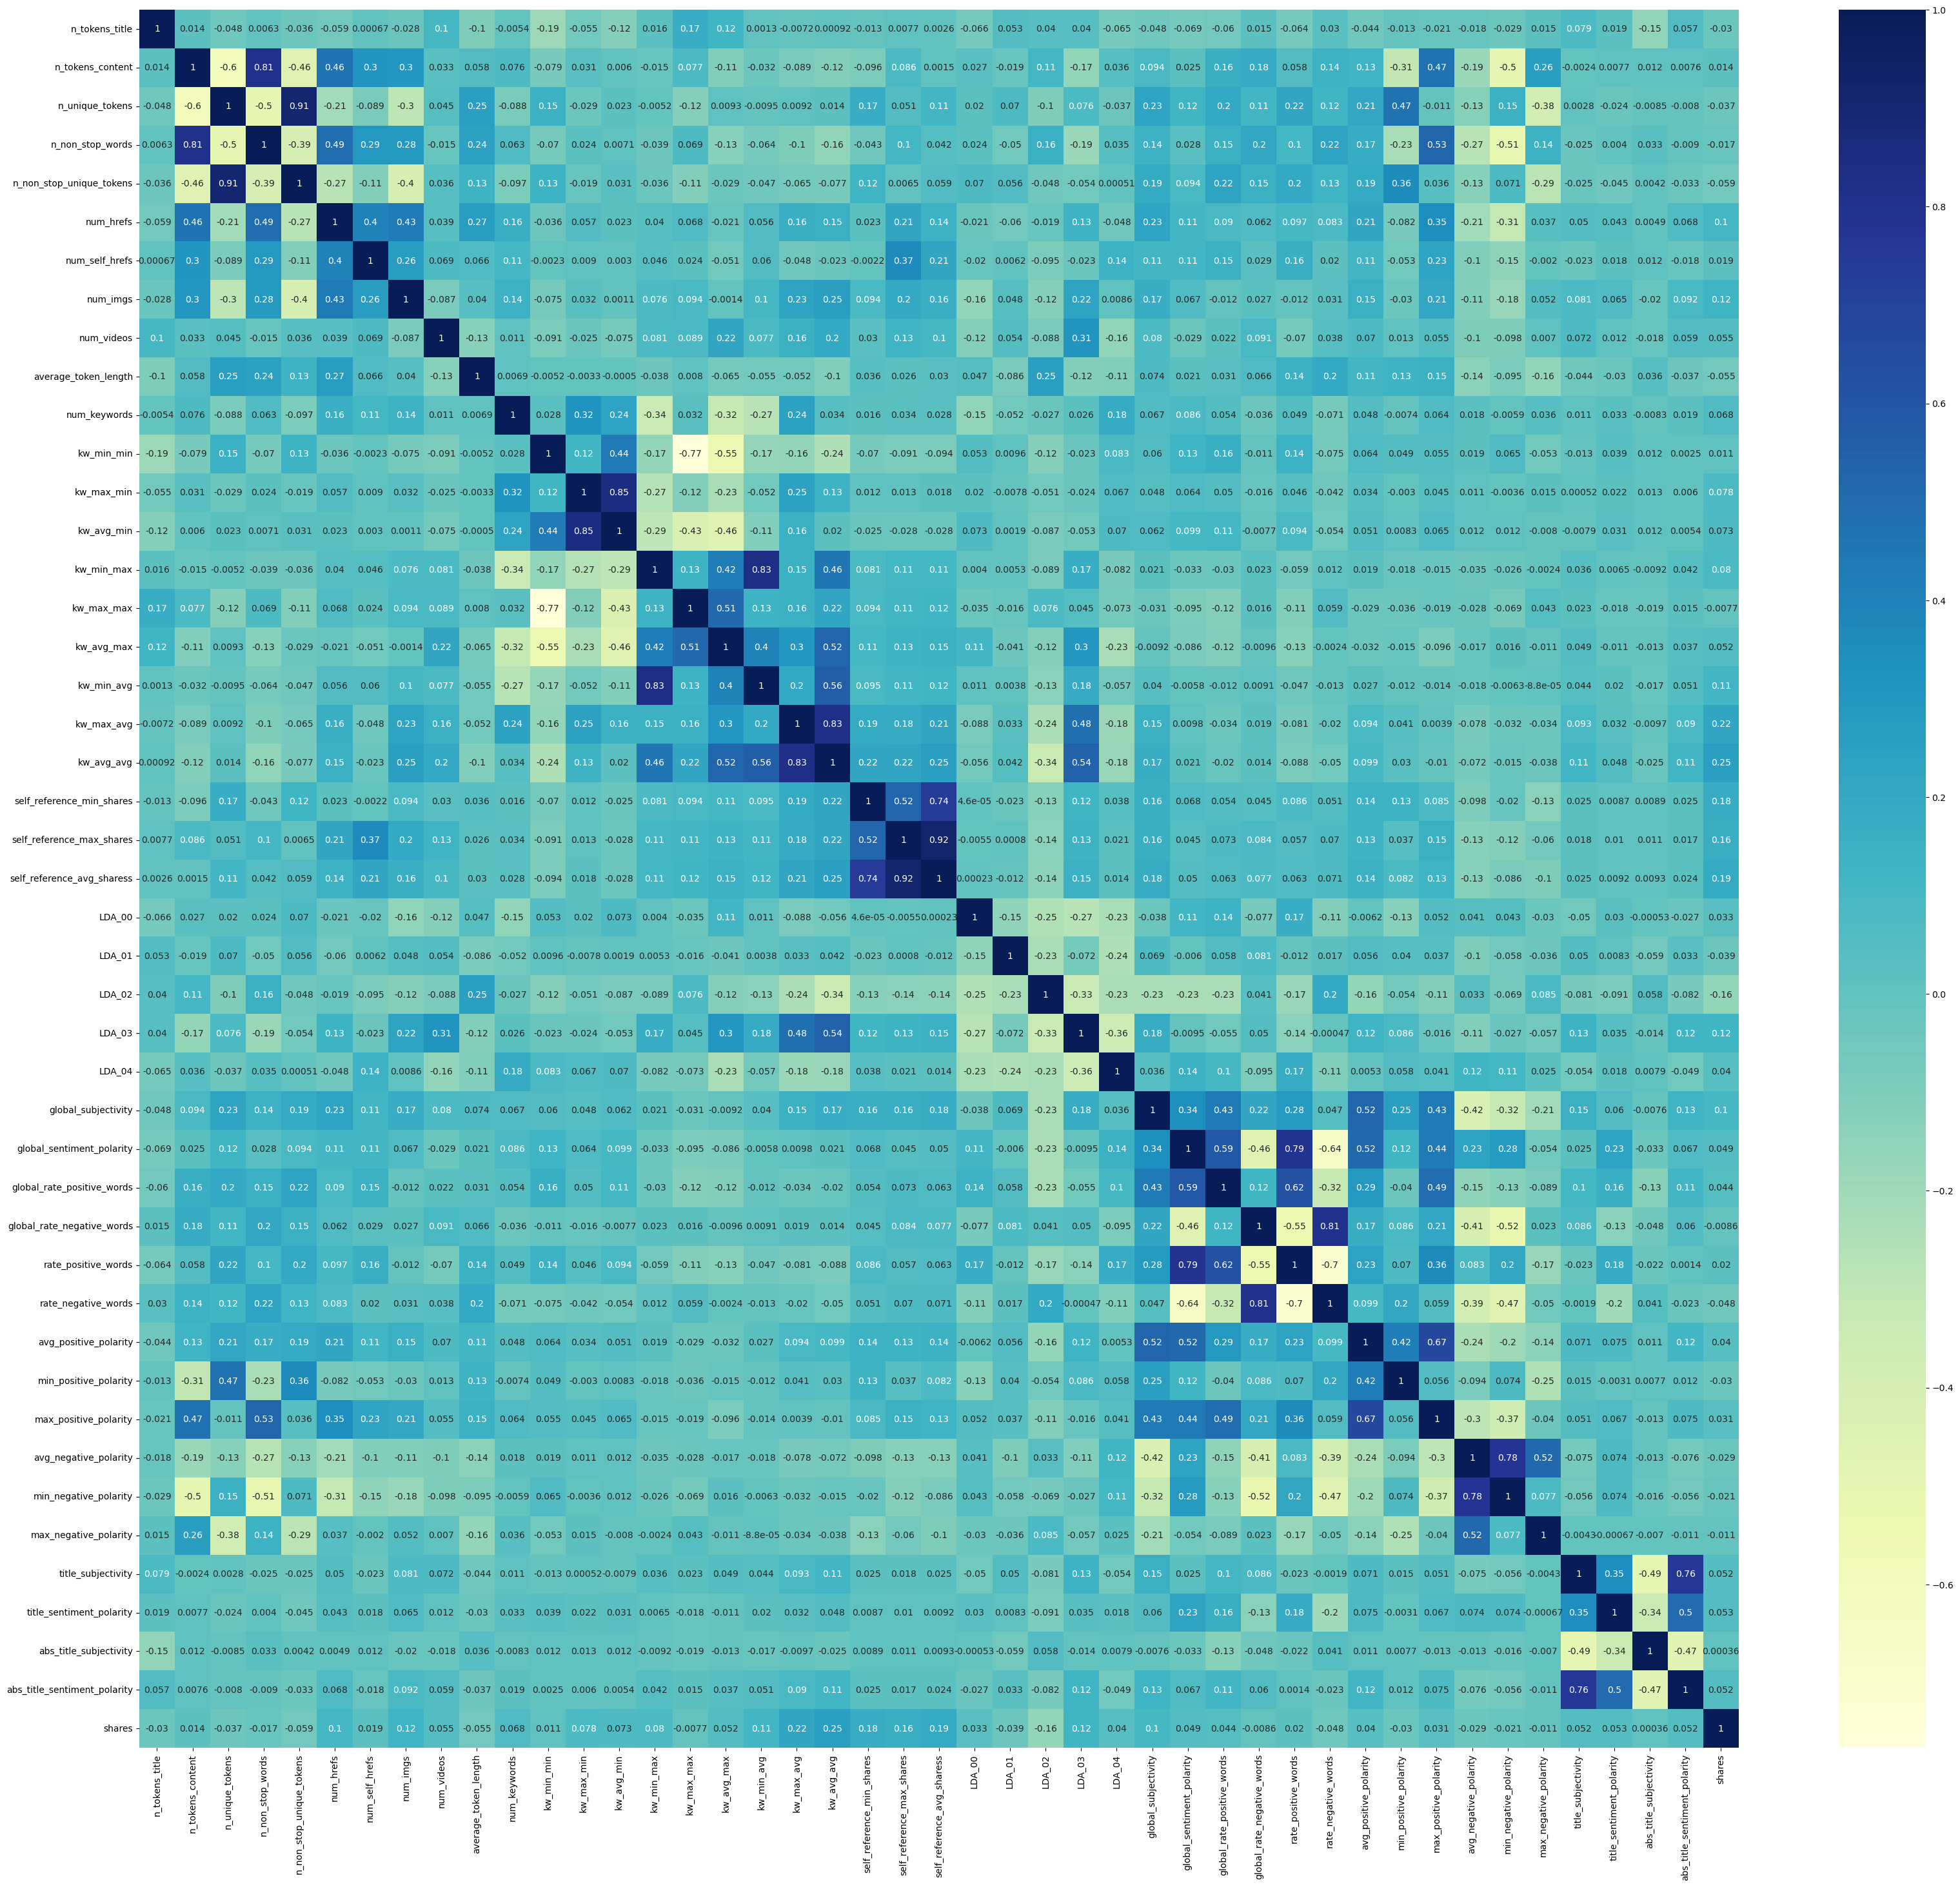

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 35))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Model building

In [39]:
X = data.drop(['shares'], axis=1) # drop target var
y = data["shares"] #select tearget var

print(X.shape,y.shape)

(29733, 58) (29733,)


####  scaling for numeric features

In [40]:
X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,29733.000000,29733.000000,29733.000000,2.973300e+04,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,2.973300e+04,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000
mean,10.401439,517.266488,0.538544,1.000000e+00,0.686881,9.962540,2.991804,3.413489,0.548910,4.661018,7.218890,2.010197,782.740809,265.300804,5210.348221,822983.956966,258138.530473,1121.566652,5087.031883,3078.920287,1892.136124,5488.343420,3603.542877,0.157941,0.099647,0.210854,0.223467,0.233266,0.449955,0.118784,0.039389,0.016276,0.691175,0.286758,0.357087,0.087688,7.549557e-01,-0.256681,-0.521347,-0.097718,0.282006,0.061673,0.342336,0.145951
std,2.110009,365.671122,0.110407,3.481680e-09,0.105508,7.678315,2.219080,3.951190,0.809127,0.299578,1.899256,4.182928,499.230460,169.142063,7189.764210,35963.764643,129871.309154,1133.727309,2002.397114,976.875121,1870.575695,6151.594079,3681.492408,0.202487,0.117780,0.268887,0.294725,0.288963,0.090347,0.092261,0.016938,0.009664,0.160438,0.152429,0.087401,0.045355,2.484762e-01,0.120063,0.290079,0.059733,0.323924,0.160445,0.186692,0.195179
min,4.500000,0.000000,0.264861,1.000000e+00,0.434678,-4.670826,-3.500000,-5.252581,-1.500000,3.910992,1.500000,-8.500000,-390.000000,-9.395161,-12000.000000,759589.626446,-64648.214285,-1125.460625,-167.527034,568.518922,-2457.500000,-8436.757999,-3285.684641,0.000000,0.000000,0.000000,0.000000,0.000000,0.236053,-0.122076,-0.004413,-0.008659,0.300000,-0.101019,0.147279,-0.025000,-1.110223e-16,-0.540774,-1.201953,-0.237500,0.000000,-0.213636,0.000000,-0.069083
25%,9.000000,245.000000,0.471376,1.000000e+00,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,-1.000000,444.000000,141.142857,0.000000,809815.850579,173385.714286,0.000000,3557.341810,2389.803793,637.000000,1000.000000,981.000000,0.025060,0.025013,0.028571,0.028571,0.028574,0.398333,0.057619,0.028351,0.009615,0.600000,0.186047,0.305474,0.050000,6.000000e-01,-0.327976,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,407.000000,0.540000,1.000000e+00,0.691275,8.000000,3.000000,1.000000,0.000000,4.663717,7.000000,-1.000000,659.000000,234.125000,1400.000000,843300.000000,245274.800000,1036.142857,4359.070028,2875.118743,1200.000000,2900.000000,2200.000000,0.033389,0.033346,0.040005,0.040001,0.040771,0.453333,0.118855,0.039062,0.015385,0.709524,0.280000,0.358912,0.100000,8.000000e-01,-0.253333,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.016667
75%,12.000000,714.000000,0.609053,1.000000e+00,0.754545,13.810549,4.000000,5.168387,1.000000,4.854545,9.000000,4.000000,1000.000000,355.000000,8000.000000,843300.000000,332075.000000,2052.531165,6040.587705,3603.993707,2700.000000,8100.000000,5200.000000,0.242018,0.150309,0.334032,0.376661,0.397958,0.506520,0.177416,0.050193,0.021798,0.800000,0.384615,0.410938,0.100000,1.000000e+00,-0.186111,-0.300000,-0.050000,0.500000

In [41]:
num_cols1=[*X._get_numeric_data().columns]

In [42]:
#scaling using standard scaler
scaler = StandardScaler()
X[num_cols1] = scaler.fit_transform(X[num_cols1])

X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04,2.973300e+04
mean,4.406390e-16,3.030343e-17,3.917594e-16,1.841451e-09,-9.153450e-16,-4.008535e-16,2.635407e-17,-5.194110e-16,8.297492e-16,-1.179529e-15,-3.147742e-17,1.135510e-15,1.249127e-16,2.536844e-16,-4.736978e-16,2.224314e-15,1.447289e-17,-6.860807e-16,-3.582750e-16,-1.712625e-16,-2.469652e-16,-1.907315e-16,1.135577e-16,2.092408e-16,1.076505e-17,-1.113483e-16,-3.308303e-17,4.980377e-17,3.061860e-17,1.387993e-16,1.093383e-16,5.346755e-16,-2.297590e-16,-2.315812e-17,4.798420e-16,-3.736179e-16,-3.028478e-16,-2.364727e-16,-2.219849e-16,5.835420e-16,4.333503e-16,2.021410e-15,5.983407e-16,2.492242e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.796926e+00,-1.414591e+00,-2.478903e+00,-2.354214e+00,-2.390407e+00,-1.905837e+00,-2.925498e+00,-2.193318e+00,-2.532290e+00,-2.503652e+00,-3.011172e+00,-2.512684e+00,-2.349137e+00,-1.624082e+00,-2.393769e+00,-1.762758e+00,-2.485477e+00,-1.982015e+00,-2.624178e+00,-2.569872e+00,-2.325332e+00,-2.263695e+00,-1.871345e+00,-7.800175e-01,-8.460550e-01,-7.841879e-01,-7.582338e-01,-8.072666e-01,-2.367598e+00,-2.610683e+00,-2.586114e+00,-2.580103e+00,-2.438202e+00,-2.544017e+00,-2.400563e+00,-2.484638e+00,-3.038393e+00,-2.366241e+00,-2.346320e+00,-2.340145e+00,-8.706089e-01,-1.715940e+00,-1.833723e+00,-1.101740e+00
25%,-6.641978e-01,-7.445791e-01,-6.083754e-01,-4.787943e-01,-5.713622e-01,-7.765559e-01,-8.975964e-01,-6.108360e-01,-6.784093e-01,-6.138539e-01,-6.417833e-01,-7.196509e-01,-6.785373e-01,-7.340577e-01,-7.247019e-01,-3.661554e-01,-6.526017e-01,-9.892904e-01,-7.639423e-01,-7.054413e-01,-6.710005e-01,-7.296351e-01,-7.123706e-01,-6.562552e-01,-6.336798e-01,-6.779278e-01,-6.612893e-01,-7.083811e-01,-5.713786e-01,-6.629628e-01,-6.517135e-01,-6.891665e-01,-5.682937e-01,-6.607187e-01,-5.905397e-01,-8.309703e-01,-6.236343e-01,-5.938273e-01,-6.158884e-01,-4.567343e-01,-8.706089e-01,-3.843957e-01,-9.409714e-01,-7.477897e-01
50%,-1.902581e-01,-3.015506e-01,1.318684e-02,2.811964e-01,4.165102e-02,-2.555995e-01,3.693320e-03,-6.108360e-01,-6.784093e-01,9.008605e-03,-1.152524e-01,-7.196509e-01,-2.478673e-01,-1.843204e-01,-5.299774e-01,5.649126e-01,-9.905149e-02,-7.534901e-02,-3.635513

In [43]:
#split in to test train data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size = 0.3, random_state = 42)


### Linear Regression model

- Bulding Linear Regression model using RFE

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
linreg = LinearRegression()

# running RFE with 15 variables as output 
    
rfe = RFE(estimator=linreg, n_features_to_select=15)          
rfe = rfe.fit(X_train,y_train)

print(rfe.ranking_)

[34  8  4  7 20  6 11 16 15 30 31  1  1  1  1  5  1 28 38 37 32 10  1 27
 33  1  3 17  1  9 39 40 41  2  1  1  1 12  1  1  1  1 13 36 22 23 24 29
 25 14 42 26 35 44 18 21 19 43]


In [46]:
col = X_train.columns[rfe.support_]
X_train1 =X_train[col]

In [47]:
#fir Linear reg model using cols selected by RFE
from sklearn import metrics
reg = LinearRegression()

reg.fit(X_train1, y_train)

LinearRegression()

In [48]:
X_test1 = X_test[col]

In [49]:
y_test_pred = reg.predict(X_test1)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test, y_pred = y_test_pred)   #r2 score

0.11436997379379898

In [51]:
print(reg.intercept_)
print(reg.coef_)

2305.3801934763533
[-318.97578088 -487.22052384 -429.37011867  115.28074355 -303.22906354
 -152.93364645  374.70846765  201.27318173  309.02431764  317.92191336
  145.68553685 -119.08894474 -197.61696328 -144.697483   -113.62855005]


In [52]:
y_pred =  reg.predict(X_train1)

In [53]:
from sklearn.metrics import mean_squared_error

rss = np.sum(np.square(y_train-y_pred))
mse= mean_squared_error(y_train,y_pred)
rmse = mse*0.5

rss,mse,rmse

(48953347918.649086, 2352056.3070508377, 1176028.1535254188)

** Residual Analysis **

Text(0, 0.5, 'y_pred')

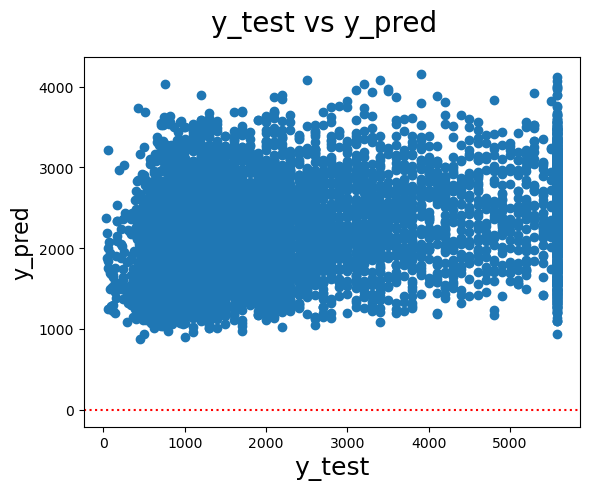

In [54]:

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.axhline(y=0,color ='r',linestyle = ':')
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16)  

Text(0.5, 0, 'Errors')

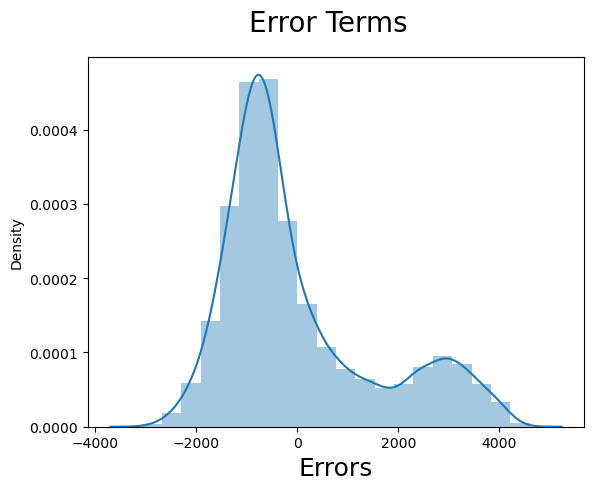

In [55]:

fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

It seems it is not randomly scattered around 0.

- As we can observefrom above analysis, R2 score not at all great and error terms are not normally distributed.
- Let us try diffrerent regression techniques to deal with non lineaarity in the data

## Using PCA for Feature elimination

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [58]:
pca.components_

array([[-7.03468619e-03, -2.05502473e-01,  2.45539435e-02, ...,
        -5.46277283e-02,  4.05135530e-02, -1.08327282e-01],
       [-8.54293421e-02, -1.37417456e-02,  1.45824602e-01, ...,
         9.82887784e-02, -2.52298690e-02,  2.61067031e-02],
       [ 1.64883915e-02, -3.48688548e-01,  2.87977572e-01, ...,
         6.03643482e-02, -4.75235595e-02,  6.60966862e-02],
       ...,
       [-1.48854722e-03, -4.90026414e-03, -3.31808104e-02, ...,
         8.61649138e-04,  6.30234212e-04,  7.75056229e-04],
       [-3.83607359e-04, -1.41374870e-03, -7.54693273e-03, ...,
        -1.06476229e-04, -1.15751706e-04, -1.24991435e-03],
       [ 2.88152874e-04, -2.83335537e-04, -2.51620173e-03, ...,
        -3.01517434e-04, -3.67114714e-04, -2.47212732e-04]])

In [59]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

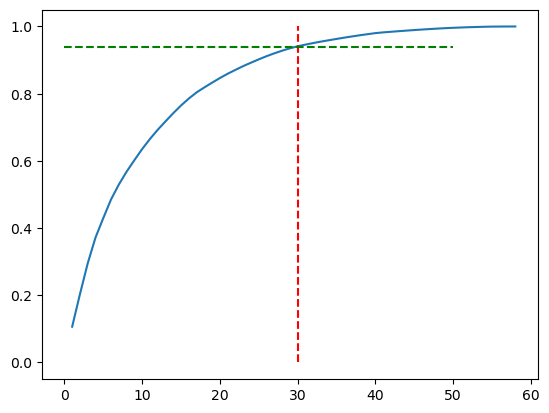

In [60]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.94, xmax=50, xmin=0, colors="g", linestyles="--")

In [ ]:
pc2 =  PCA(n_components =  30)
newdata = pc2.fit_transform(X_train)

In [ ]:
newdata.shape

In [ ]:
corrmat = np.corrcoef(newdata.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC-1':pc2.components_[0],'PC-2':pc2.components_[1], 'PC-3':pc2.components_[2],'Feature':col})
df_pca.head(10)

In [ ]:
X_train_pca = X_train[df_pca.Feature[:30]]
X_train_pca.shape

In [ ]:
PCA_VARS = 30
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("linear", LinearRegression())
        ]

In [ ]:
pipeline = Pipeline(steps)

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
# check score on train data
pipeline.score(X_train, y_train)

In [ ]:
# predict 
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

In [ ]:
len(train_pred)

In [ ]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

In [ ]:
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

### Polynomial Regression

In [ ]:
PCA_VARS = 30
steps2 = [("pca", PCA(n_components=PCA_VARS)),
         ("poly",PolynomialFeatures(degree=2)),
         ("linear", LinearRegression()),
        ]

In [ ]:
poly_pipe = Pipeline(steps2)
poly_pipe.fit(X_train, y_train)

In [ ]:
train_pred = poly_pipe.predict(X_train)
test_pred = poly_pipe.predict(X_test)

In [ ]:
print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

In [ ]:
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

### Ridge Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


hyper_parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

rr = Ridge()

model_cv =  GridSearchCV(estimator = rr, 
                        param_grid = hyper_parameters, 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)    


           
model_cv.fit(X_train_pca, y_train) 

In [ ]:
model_cv.best_params_

In [ ]:
PCA_VARS = 30
steps3 = [("pca", PCA(n_components=PCA_VARS)),
         ("rr",Ridge(alpha=100))
          ]
rr_pipe = Pipeline(steps3)
rr_pipe.fit(X_train, y_train)

In [ ]:
train_pred = rr_pipe.predict(X_train)
test_pred = rr_pipe.predict(X_test)

In [ ]:
print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

In [ ]:
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

#### Lasso

In [ ]:
hyper_parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}     #assigning alpha val

lr = Lasso()

model_cv =  GridSearchCV(estimator = lr, 
                        param_grid = hyper_parameters, 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)    


           
model_cv.fit(X_train, y_train) #fit model

In [ ]:
model_cv.best_params_

In [ ]:
PCA_VARS = 30
steps3 = [("pca", PCA(n_components=PCA_VARS)),
         ("lr",Lasso(alpha=1))
          ]
lr_pipe = Pipeline(steps3)
lr_pipe.fit(X_train, y_train)  #fit model

In [ ]:
train_pred = lr_pipe.predict(X_train)
test_pred = lr_pipe.predict(X_test)

In [ ]:
print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

In [ ]:
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

### Applying changes on test_data set

- Pllynomial regression seems to have yealded better results than other models
- Let us predic unseen data using pollynomial Regression

In [ ]:
unseen[cat].head()

In [ ]:
unseen[cat] = unseen[cat].apply(lambda x: x.fillna(x.mode()[0]))    #Imputing categoring vals with modeba

In [ ]:
# using MICE technique to impute missing values in the rest of the columns
unseen[missing_vals[missing_vals.gt(0)].index]= MICE.transform(unseen[missing_vals[missing_vals.gt(0)].index])


In [ ]:
# cap outliers in the numeric columns
num_cols_un = [*unseen._get_numeric_data().columns] 
unseen[num_cols_un] = unseen[num_cols_un].apply(cap_outliers, axis=0)

In [ ]:
unseen[num_cols1] = scaler.transform(unseen[num_cols1])

In [ ]:
for i in cat:
    unseen[cat]= unseen[cat].astype('category')  

In [ ]:
#selecting cols
cols = X.columns

submission_data = unseen.loc[:,cols]

In [ ]:
y_predicted= poly_pipe.predict(submission_data)  #prediction on unseen test data

In [ ]:
submission = pd.DataFrame({"id":unseen1['id'],
                          "shares":y_predicted})
submission.to_csv('online_news.csv',index = False)

- Based on the final model Number of words in the title,Number of words in the content and Rate of unique words in the content seems to play major role in the shares 